# Question 4

### SOURCE : https://github.com/kvgarimella/dl-demos/blob/main/demo01-basics.ipynb

The code is from the demo1 lab. Added few modifications to the demo1 code as per the requirements. Added comments to show the changes made.


In [ ]:
import numpy as np
import torch
import torchvision
import tensorflow as tf
import matplotlib.pyplot as plt

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Training and test data

We are using a popular image dataset called Fashion-MNIST.

In [ ]:
trainingdata = torchvision.datasets.FashionMNIST('./FashionMNIST/',train=True,download=True,transform=torchvision.transforms.ToTensor())
testdata = torchvision.datasets.FashionMNIST('./FashionMNIST/',train=False,download=True,transform=torchvision.transforms.ToTensor())

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ./FashionMNIST/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./FashionMNIST/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ./FashionMNIST/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./FashionMNIST/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ./FashionMNIST/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./FashionMNIST/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ./FashionMNIST/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./FashionMNIST/FashionMNIST/raw



In [ ]:
print(len(trainingdata))
print(len(testdata))

60000
10000


In [ ]:
trainDataLoader = torch.utils.data.DataLoader(trainingdata,batch_size=64,shuffle=True)
testDataLoader = torch.utils.data.DataLoader(testdata,batch_size=64,shuffle=False)

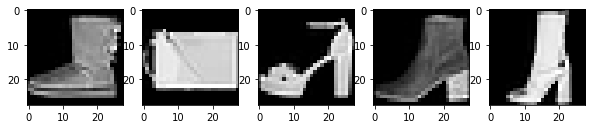

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
images, labels = next(iter(trainDataLoader))
plt.figure(figsize=(10,4))
for index in np.arange(0,5):
 plt.subplot(1,5,index+1)
 plt.imshow(images[index].squeeze().numpy(),cmap=plt.cm.gray)

## Neural Network Model

#### Using a dense neural network with three  hidden layers with 256, 128, and 64 neurons respectively, all with ReLU activations, we do not add the RELU to the last layer





In [ ]:
class LinearReg(torch.nn.Module):
    def __init__(self):
        super(LinearReg, self).__init__()
        self.flatten = torch.nn.Flatten()
        self.linear_relu_stack = torch.nn.Sequential(
            torch.nn.Linear(28*28, 256),
            torch.nn.ReLU(),
            torch.nn.Linear(256, 128),
            torch.nn.ReLU(),
            torch.nn.Linear(128, 64),
            torch.nn.ReLU(),
            torch.nn.Linear(64, 10),
            )

    def forward(self, x):
#         x = x.view(-1,28*28)
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

net = LinearReg().to(device)
Loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=0.001)

In [ ]:
train_loss_history = []
test_loss_history = []
train_accuracy_history = []
test_accuracy_history = []

for epoch in range(20):
    train_loss = 0.0
    test_loss = 0.0
    train_score = 0.0
    test_score = 0.0
    for i, data in enumerate(trainDataLoader):
        images, labels = data
        images = images.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        predicted_output = net(images)
        _, predictions = torch.max(predicted_output, 1)
        fit = Loss(predicted_output,labels)
        fit.backward()
        optimizer.step()
        train_loss += fit.item()
        train_score += (predictions == labels ).float().sum()
    for i, data in enumerate(testDataLoader):
        with torch.no_grad():
            images, labels = data
            images = images.to(device)
            labels = labels.to(device)
            predicted_output = net(images)
            _, predictions = torch.max(predicted_output, 1)
            fit = Loss(predicted_output,labels)
            test_loss += fit.item()
            test_score += (predictions == labels ).float().sum()
    train_loss = train_loss/len(trainDataLoader)
    test_loss = test_loss/len(testDataLoader)
    train_accuracy = train_score/len(trainDataLoader)
    test_accuracy = test_score / len(testDataLoader)
    train_loss_history.append(train_loss)
    test_loss_history.append(test_loss)
    train_accuracy_history.append(train_accuracy)
    test_accuracy_history.append(test_accuracy)
    print('Epoch %s, Train loss = %s, Test loss = %s , Train Accuracy = %s, Test Accuracy = %s'%(epoch, train_loss, test_loss, train_accuracy, test_accuracy))


Epoch 0, Train loss = 0.5695085177289397, Test loss = 0.4370952244776829 , Train Accuracy = tensor(51.0320), Test Accuracy = tensor(53.6943)
Epoch 1, Train loss = 0.3841162469110954, Test loss = 0.4033075337577018 , Train Accuracy = tensor(55.0426), Test Accuracy = tensor(54.5096)
Epoch 2, Train loss = 0.344089510836708, Test loss = 0.38397752109226907 , Train Accuracy = tensor(55.8529), Test Accuracy = tensor(54.7898)
Epoch 3, Train loss = 0.31887571042629953, Test loss = 0.3903905833792535 , Train Accuracy = tensor(56.4733), Test Accuracy = tensor(54.7325)
Epoch 4, Train loss = 0.2997954392245711, Test loss = 0.3605613463623509 , Train Accuracy = tensor(56.8827), Test Accuracy = tensor(55.1975)
Epoch 5, Train loss = 0.2836886145778175, Test loss = 0.3466275479573353 , Train Accuracy = tensor(57.1770), Test Accuracy = tensor(55.7580)
Epoch 6, Train loss = 0.2711759890034509, Test loss = 0.34319638351725923 , Train Accuracy = tensor(57.4989), Test Accuracy = tensor(55.8280)
Epoch 7, Tr

### Training and Testing Accuracy

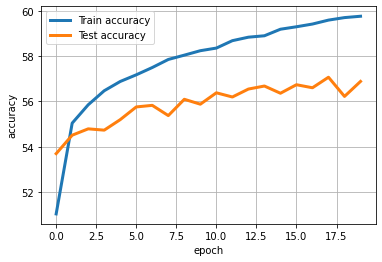

In [ ]:
plt.plot(range(20),train_accuracy_history,'-',linewidth=3,label='Train accuracy')
plt.plot(range(20),test_accuracy_history,'-',linewidth=3,label='Test accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.grid(True)
plt.legend()

##Comments : Plot class wise probabilities and the images.

In [ ]:
# Selecting 3 random images from the image dataset
l =np.random.randint(15, size=(3))
Img1 = images[l[0]]
Img2 = images[l[1]]
Img3 = images[l[2]]
img_labels = np.arange(10)


In [ ]:
# Image Idx and labels
dic_output = { 0: "T-shirt/Top",
                 1: "Trouser",
                 2: "Pullover",
                 3: "Dress",
                 4: "Coat", 
                 5: "Sandal", 
                 6: "Shirt",
                 7: "Sneaker",
                 8: "Bag",
                 9: "Ankle Boot"
                 }

#getting the image label and its index for the selected image in the plots below.
def get_prediction(output, dic_output):
    get_max = max(output[0])
    li = output[0].tolist()
    idx = li.index(get_max)
    return dic_output[idx] , idx

##First Image 

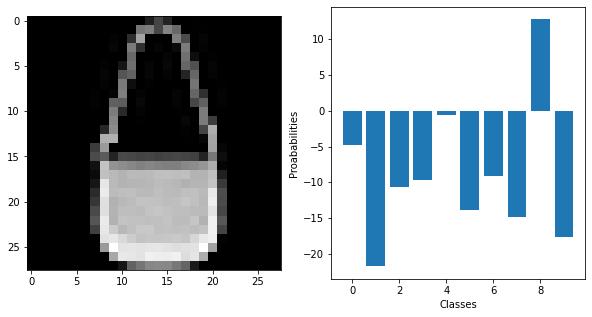

Image selected: Bag
Class which has the highest Probability: 8


In [ ]:
image = Img1.to(device)
output = net(image)
output = output.to(device)
fig = plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
plt.imshow(image.cpu().squeeze().numpy(),cmap=plt.cm.gray)
plt.subplot(1,2,2)
plt.bar(img_labels, output[0].cpu().detach())
plt.xlabel("Classes")
plt.ylabel("Proababilities")
plt.show()
print('Image selected: '+ get_prediction(output, dic_output)[0] )
print('Class which has the highest Probability: '+ str(get_prediction(output, dic_output)[1]))

###Second Image

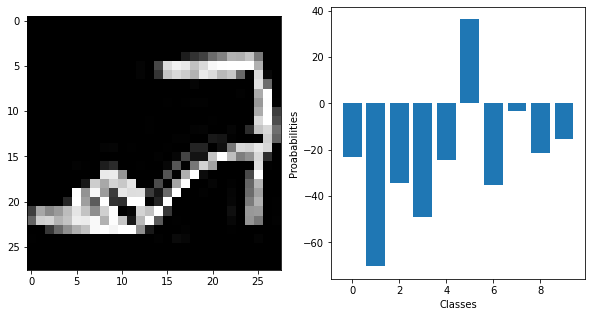

Image selected: Sandal
Class which has the highest Probability: 5


In [ ]:
image = Img2.to(device)
output = net(image)
output = output.to(device)
fig = plt.figure(figsize = (10, 5))
plt.subplot(1,2,1)
plt.imshow(Img2.cpu().squeeze().numpy(),cmap=plt.cm.gray)
plt.subplot(1,2,2)
plt.bar(img_labels, output[0].cpu().detach())
plt.xlabel("Classes")
plt.ylabel("Proababilities")
plt.show()
print('Image selected: '+ get_prediction(output, dic_output)[0] )
print('Class which has the highest Probability: '+ str(get_prediction(output, dic_output)[1]))

###Third Image

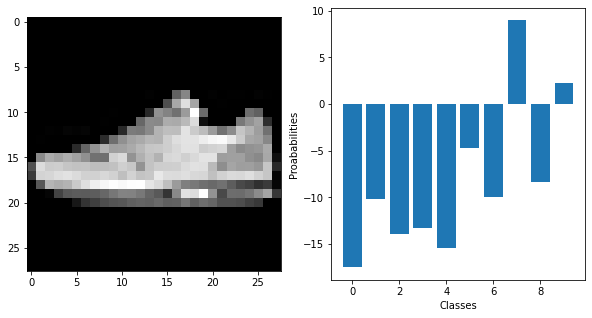

Image selected: Sneaker
Class which has the highest Probability: 7


In [ ]:
image = Img3.to(device)
output = net(image)
output = output.to(device)
fig = plt.figure(figsize = (10, 5))
plt.subplot(1,2,1)
plt.imshow(Img3.cpu().squeeze().numpy(),cmap=plt.cm.gray)
plt.subplot(1,2,2)
plt.bar(img_labels, output[0].cpu().detach())
plt.xlabel("Classes")
plt.ylabel("Proababilities")
plt.show()
print('Image selected: '+ get_prediction(output, dic_output)[0] )
print('Class which has the highest Probability: '+ str(get_prediction(output, dic_output)[1]))

Final Comments : About the observations above Prediction and Probability matches with the images as observed by human eye.